In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading the dataset

In [2]:
df = pd.read_csv("house_price_bd.csv")

In [3]:
df.head()

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,3,vacant,1960.0,dhaka,"৳39,000,000","Gulshan 1, Gulshan"
1,Valuable 1705 Square Feet Apartment Is Ready T...,3.0,3.0,1,vacant,1705.0,dhaka,"৳16,900,000","Lake Circus Road, Kalabagan"
2,1370 square feet apartment is ready to sale in...,3.0,3.0,6,vacant,1370.0,dhaka,"৳12,500,000","Shukrabad, Dhanmondi"
3,2125 Square Feet Apartment For Sale In Bashund...,3.0,3.0,4,vacant,2125.0,dhaka,"৳20,000,000","Block L, Bashundhara R-A"
4,Buy This 2687 Square Feet Flat In The Nice Are...,3.0,3.0,4,vacant,2687.0,dhaka,"৳47,500,000","Road No 25, Banani"


In [4]:
df.shape

(3865, 9)

In [5]:
df.describe()

,Bedrooms,Bathrooms,Floor_area
count,2864.000000,2864.000000,3766.000000
mean,3.133031,2.992668,1940.299522
std,2.215457,0.978434,6024.921935
min,1.000000,1.000000,84.000000
25%,3.000000,3.000000,1100.000000
50%,3.000000,3.000000,1380.000000
75%,3.000000,3.000000,1860.000000
max,50.000000,10.000000,195840.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             3865 non-null   object 
 1   Bedrooms          2864 non-null   float64
 2   Bathrooms         2864 non-null   float64
 3   Floor_no          3181 non-null   object 
 4   Occupancy_status  3766 non-null   object 
 5   Floor_area        3766 non-null   float64
 6   City              3865 non-null   object 
 7   Price_in_taka     3865 non-null   object 
 8   Location          3859 non-null   object 
dtypes: float64(3), object(6)
memory usage: 271.9+ KB


Data Cleaning

Duplicates

In [7]:
df_clean = df.copy()

In [8]:
df_clean.duplicated().sum()

934

In [9]:
df_clean.drop_duplicates(inplace = True)

In [10]:
df_clean.shape

(2931, 9)

Missing Data

In [11]:
df_clean.isna().sum()

Title                 0
Bedrooms            831
Bathrooms           831
Floor_no            575
Occupancy_status     89
Floor_area           89
City                  0
Price_in_taka         0
Location              6
dtype: int64

Fixing the Floor number column

Fixing this column first to clarify the confusion of floor number

In [12]:
df_clean["Floor_no"].value_counts()

Floor_no
1                       379
4                       306
5                       293
2                       274
3                       261
6                       249
7                       200
8                       184
9                       126
10                       23
11                       20
12                       16
13                        7
Merin City - Purbach      6
14                        2
1st                       1
8th                       1
A1,A2,A3,A4,A5,A6,A7      1
0+7                       1
1F                        1
4th to 8th Backside       1
18                        1
5th                       1
17                        1
G+7                       1
Name: count, dtype: int64

In [13]:
df_clean[df_clean["Floor_no"] == "Merin City - Purbach"]

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
3313,Plot For Sale In A Suitable Place In Bproperty...,NaN,NaN,Merin City - Purbach,vacant,2160.0,narayanganj-city,"৳4,575,000","Rupganj, Narayanganj"
3388,"For Sale, Residential Plot Is Situated In Bpro...",NaN,NaN,Merin City - Purbach,vacant,2160.0,narayanganj-city,"৳4,575,000","Rupganj, Narayanganj"
3392,Plot For Sale In A Suitable Place In Bproperty...,NaN,NaN,Merin City - Purbach,vacant,2160.0,narayanganj-city,"৳4,575,000","Rupganj, Narayanganj"
3393,Plot For Sale In A Suitable Place In Bproperty...,NaN,NaN,Merin City - Purbach,vacant,2160.0,narayanganj-city,"৳4,575,000","Rupganj, Narayanganj"
3432,In The Beautiful Location Of Bproperty Village...,NaN,NaN,Merin City - Purbach,vacant,2160.0,narayanganj-city,"৳4,575,000","Rupganj, Narayanganj"
3492,Plot For Sale In A Suitable Place In Narayanga...,NaN,NaN,Merin City - Purbach,vacant,2160.0,narayanganj-city,"৳4,575,000","Rupganj, Narayanganj"


In [14]:
df_clean = df_clean[df_clean['Floor_no'] != 'Merin City - Purbach']

In [15]:
df_clean[df_clean['Floor_no'] == '4th to 8th Backside']

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
2674,An Apartment Is Up For Sale In Dakshin Kattali...,3.0,3.0,4th to 8th Backside,vacant,1250.0,chattogram,"৳3,800,000","Dakshin Kattali, 11 No. South Kattali Ward"


In [16]:
# Rows to replace (indices where 'Floor_no' contains '4th to 8th Backside')
rows_to_replace = df_clean[df_clean['Floor_no'] == '4th to 8th Backside']

# Create new rows for each floor from 4 to 8
new_rows = []
for i in range(4, 9):  # Floors from 4 to 8
    for index, row in rows_to_replace.iterrows():
        new_row = row.copy()
        new_row['Floor_no'] = i  # Set the floor number as a numeric value
        new_rows.append(new_row)

# Convert the list of new rows to a DataFrame
new_rows_df = pd.DataFrame(new_rows)

# Remove the original rows
df_clean = df_clean.drop(rows_to_replace.index)

# Use pd.concat() to append the new rows to the DataFrame
df_clean = pd.concat([df_clean, new_rows_df], ignore_index=True)

In [17]:
new_rows_df

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
2674,An Apartment Is Up For Sale In Dakshin Kattali...,3.0,3.0,4,vacant,1250.0,chattogram,"৳3,800,000","Dakshin Kattali, 11 No. South Kattali Ward"
2674,An Apartment Is Up For Sale In Dakshin Kattali...,3.0,3.0,5,vacant,1250.0,chattogram,"৳3,800,000","Dakshin Kattali, 11 No. South Kattali Ward"
2674,An Apartment Is Up For Sale In Dakshin Kattali...,3.0,3.0,6,vacant,1250.0,chattogram,"৳3,800,000","Dakshin Kattali, 11 No. South Kattali Ward"
2674,An Apartment Is Up For Sale In Dakshin Kattali...,3.0,3.0,7,vacant,1250.0,chattogram,"৳3,800,000","Dakshin Kattali, 11 No. South Kattali Ward"
2674,An Apartment Is Up For Sale In Dakshin Kattali...,3.0,3.0,8,vacant,1250.0,chattogram,"৳3,800,000","Dakshin Kattali, 11 No. South Kattali Ward"


In [18]:
df_clean[df_clean["Floor_no"] == "8th"]

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
34,An Apartment For Sale Is All Set For You To Se...,3.0,3.0,8th,vacant,1100.0,dhaka,"৳4,700,000","Dhaka Uddan, Mohammadpur"


In [19]:
df_clean[df_clean["Floor_no"] == "5th"]

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
2126,Take This Residential Flat Is For Sale At Baya...,3.0,2.0,5th,vacant,1162.0,chattogram,"৳5,000,000","Chadra Nagar, Bayazid"


In [20]:
df_clean[df_clean["Floor_no"] == "1st"]

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
741,Imagine A Spacious Flat That Comes With Your A...,4.0,5.0,1st,vacant,2380.0,dhaka,"৳29,000,000","Block D, Bashundhara R-A"


In [21]:
df_clean[df_clean["Floor_no"] == "1F"]

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
1551,"At Bayazid, Flat For Sale Close To Bayazid Thana",3.0,3.0,1F,vacant,1313.0,chattogram,"৳6,500,000","Chadra Nagar, Bayazid"


In [22]:
df_clean["Floor_no"] = df_clean["Floor_no"].str.replace(r"th|st|F", "", regex=True)

In [23]:
df_clean[(df_clean["Floor_no"] == "G+7") | (df_clean["Floor_no"] == "0+7")]

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
217,19200 SQ FT Full-Building is now for sale in M...,46.0,10.0,G+7,vacant,19200.0,dhaka,"৳75,000,000","Section 1, Mirpur"
1458,A Residential Building Which Is Up For Sale At...,21.0,10.0,0+7,vacant,13300.0,chattogram,"৳105,000,000","Rose Valley Residential Area, 9 No. North Paha..."


In [24]:
df_clean[df_clean["Floor_no"] == "G+7"]

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
217,19200 SQ FT Full-Building is now for sale in M...,46.0,10.0,G+7,vacant,19200.0,dhaka,"৳75,000,000","Section 1, Mirpur"


In [25]:
df_clean[df_clean["Floor_no"] == "0+7"]

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
1458,A Residential Building Which Is Up For Sale At...,21.0,10.0,0+7,vacant,13300.0,chattogram,"৳105,000,000","Rose Valley Residential Area, 9 No. North Paha..."


In [26]:
df_clean["Floor_no"] = df_clean["Floor_no"].str.replace(r"G\+7|0\+7", "8", regex=True)

In [27]:
df_clean[df_clean["Floor_no"] == "A1,A2,A3,A4,A5,A6,A7"]

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
1104,A Full Building Is For Sale In Sugandha Reside...,18.0,10.0,"A1,A2,A3,A4,A5,A6,A7",vacant,10890.0,chattogram,"৳105,000,000","Sugandha Residential Area, Panchlaish"


In [28]:
df_clean["Floor_no"] = df_clean["Floor_no"].str.replace("A1,A2,A3,A4,A5,A6,A7", "4")

In [29]:
df_clean["Floor_no"].value_counts(dropna = False)

Floor_no
NaN    580
1      381
4      307
5      294
2      274
3      261
6      249
7      200
8      187
9      126
10      23
11      20
12      16
13       7
14       2
18       1
17       1
Name: count, dtype: int64

In [30]:
df_clean["Floor_no"] = df_clean["Floor_no"].astype("float")

In [31]:
df_clean.dtypes

Title                object
Bedrooms            float64
Bathrooms           float64
Floor_no            float64
Occupancy_status     object
Floor_area          float64
City                 object
Price_in_taka        object
Location             object
dtype: object

To clarify Floor_no (floor number) confusion now we add a new field (Type of propertie for sale) floor number can be missleading it might mean the floor number that the appartment exist in or it can mean the number of floors in a building.
In order to create these columns we are going to utilize the title column

In [32]:
building_pattern = r"building|complex|condominium|residence|property"
apartment_pattern = r"apartment|flat|living space|apt."
commercial_pattern = r"office|shop|retail|business|commercial space|warehouse|factory|store|business center|showroom|industrial space|market|plaza|outlet|commercial"
house_pattern = r"house|residential|cottage|bungalow|duplex|townhouse|family home|detached house|semi-detached house|ranch|estate|home"

In [33]:
df_clean = df_clean.assign(
    Building = np.where(
        df_clean["Title"].str.lower().str.contains(building_pattern, regex=True),1, 0),
    Appartment = np.where(
        df_clean["Title"].str.lower().str.contains(apartment_pattern, regex=True), 1, 0),
    Commercial = np.where(
        df_clean["Title"].str.lower().str.contains(commercial_pattern, regex=True), 1, 0),
    House = np.where(
        df_clean["Title"].str.lower().str.contains(house_pattern, regex=True), 1, 0)
    )

In [34]:
cities = pd.get_dummies(df_clean["City"], drop_first = True).astype("int")

Occupancy = pd.get_dummies(df_clean["Occupancy_status"], drop_first = True).astype("int")

df_clean = pd.concat([df_clean, cities, Occupancy], axis = 1)

df_clean = df_clean.rename(columns = {"chattogram": "Chattogram_city",
                                      "cumilla": "Cumilla_city",
                                      "dhaka": "Dhaka_city",
                                      "narayanganj-city": "Narayanganj_city",
                                      "gazipur": "Gazipur_city"})

df_clean["Price_in_taka"] = df_clean["Price_in_taka"].str.replace("৳|,","", regex = True).astype("float")

In [35]:
df_clean.head()

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location,Building,Appartment,Commercial,House,Cumilla_city,Dhaka_city,Gazipur_city,Narayanganj_city,vacant
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,3.0,vacant,1960.0,dhaka,39000000.0,"Gulshan 1, Gulshan",0,1,0,0,0,1,0,0,1
1,Valuable 1705 Square Feet Apartment Is Ready T...,3.0,3.0,1.0,vacant,1705.0,dhaka,16900000.0,"Lake Circus Road, Kalabagan",0,1,0,0,0,1,0,0,1
2,1370 square feet apartment is ready to sale in...,3.0,3.0,6.0,vacant,1370.0,dhaka,12500000.0,"Shukrabad, Dhanmondi",0,1,0,0,0,1,0,0,1
3,2125 Square Feet Apartment For Sale In Bashund...,3.0,3.0,4.0,vacant,2125.0,dhaka,20000000.0,"Block L, Bashundhara R-A",0,1,0,0,0,1,0,0,1
4,Buy This 2687 Square Feet Flat In The Nice Are...,3.0,3.0,4.0,vacant,2687.0,dhaka,47500000.0,"Road No 25, Banani",0,1,0,0,0,1,0,0,1


In [36]:
#pd.set_option('display.max_colwidth', None)
#pd.reset_option('display.max_colwidth')

Missing values of bedrooms, bathrooms and floor number columns 

We have 18 floor_no and we have building , appartment , house and commercial now we calculate median for each floor_no for building then for appartment then for house then for commercial. after that we use these medians that we calculated to fill missing values of bedrooms and bathrooms in each 18floor_no and each property type (building apprtement house and commercial)

Median of floor number

In [37]:
df_clean.shape

(2929, 18)

In [38]:
df_clean.isna().sum()

Title                 0
Bedrooms            825
Bathrooms           825
Floor_no            580
Occupancy_status     89
Floor_area           89
City                  0
Price_in_taka         0
Location              6
Building              0
Appartment            0
Commercial            0
House                 0
Cumilla_city          0
Dhaka_city            0
Gazipur_city          0
Narayanganj_city      0
vacant                0
dtype: int64

In [39]:
# Create dictionaries to hold median floor numbers
median_floor_no = {
    "Building": None,
    "Appartment": None,
    "House": None,
    "Commercial": None
}

# Calculate median floor_no for each property type
for property_type in ["Building", "Appartment", "House", "Commercial"]:
    sub_df = df_clean[df_clean[property_type] == 1]
    median_floor_no[property_type] = sub_df["Floor_no"].median()


In [40]:
def fill_missing_floor_no(row):
    property_type = "Building" if row["Building"] == 1 else (
        "Appartment" if row["Appartment"] == 1 else (
            "House" if row["House"] == 1 else (
                "Commercial" if row["Commercial"] == 1 else None
            )
        )
    )
    
    if property_type:
        if pd.isna(row["Floor_no"]):
            row["Floor_no"] = median_floor_no[property_type]
    
    return row

# Apply the function to fill missing Floor_no values
df_clean = df_clean.apply(fill_missing_floor_no, axis=1)


Median of bedroom and bathrooms based on the floor number

In [41]:
# Create dictionaries to hold median values
median_values = {
    "Building": {},
    "Appartment": {},
    "House": {},
    "Commercial": {}
}

# Calculate medians for each property type and floor_no
for property_type in ["Building", "Appartment", "House", "Commercial"]:
    for floor in range(1, 19):  
        sub_df = df_clean[(df_clean["Floor_no"] == floor) & (df_clean[property_type] == 1)]
        median_values[property_type][floor] = {
            "Bedrooms": sub_df["Bedrooms"].median(),
            "Bathrooms": sub_df["Bathrooms"].median()
        }

In [42]:
def fill_missing_values(row):
    property_type = "Building" if row["Building"] == 1 else (
        "Appartment" if row["Appartment"] == 1 else (
            "House" if row["House"] == 1 else (
                "Commercial" if row["Commercial"] == 1 else None
            )
        )
    )
    
    if property_type:
        floor = row["Floor_no"]
        if floor in median_values[property_type]:
            if pd.isna(row["Bedrooms"]):
                row["Bedrooms"] = median_values[property_type][floor]["Bedrooms"]
            if pd.isna(row["Bathrooms"]):
                row["Bathrooms"] = median_values[property_type][floor]["Bathrooms"]
    
    return row

# Apply the function to fill missing values
df_clean = df_clean.apply(fill_missing_values, axis=1)


In [43]:
df_clean.isna().sum()

Title                0
Bedrooms            94
Bathrooms           94
Floor_no            79
Occupancy_status    89
Floor_area          89
City                 0
Price_in_taka        0
Location             6
Building             0
Appartment           0
Commercial           0
House                0
Cumilla_city         0
Dhaka_city           0
Gazipur_city         0
Narayanganj_city     0
vacant               0
dtype: int64

Remove rows where we have no information about Bedrooms, Bathrooms, Floor number, and Floor area

In [44]:
df_clean[(df_clean["Floor_no"].isna())&(df_clean["Bedrooms"].isna())&(df_clean["Bathrooms"].isna())&(df_clean["Floor_area"].isna())]

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location,Building,Appartment,Commercial,House,Cumilla_city,Dhaka_city,Gazipur_city,Narayanganj_city,vacant
1031,5 Katha Plot Is Ready For Sale At Uttar Khan,NaN,NaN,NaN,NaN,NaN,dhaka,10000000.0,"Mainertek, Uttar Khan",0,0,0,0,0,1,0,0,0
1034,3 Katha Plot is now available for sale in Ashulia,NaN,NaN,NaN,NaN,NaN,dhaka,4000000.0,"Ashulia, Savar",0,0,0,0,0,1,0,0,0
1042,Plot For Sale in Turag close to DBBL ATM,NaN,NaN,NaN,NaN,NaN,dhaka,7500000.0,Turag,0,0,0,0,0,1,0,0,0
1045,5.445 Katha Large Plot For Sale In Ashulia,NaN,NaN,NaN,NaN,NaN,dhaka,5500000.0,"Ashulia, Savar",0,0,0,0,0,1,0,0,0
1079,View This 9 Katha Plot For Sale At Ashulia,NaN,NaN,NaN,NaN,NaN,dhaka,5985000.0,"Ashulia, Savar",0,0,0,0,0,1,0,0,0
1088,"3.33 Katha Plot Is Up For Sale In Demra, Sarulia",NaN,NaN,NaN,NaN,NaN,dhaka,6827500.0,"Sarulia, Demra",0,0,0,0,0,1,0,0,0
1367,test listing ma 24.6:2,NaN,NaN,NaN,NaN,NaN,chattogram,54235.0,NaN,0,0,0,0,0,0,0,0,0
1368,test listing ma 22.6:2,NaN,NaN,NaN,NaN,NaN,chattogram,6669.0,NaN,0,0,0,0,0,0,0,0,0
1406,tesdt 2,NaN,NaN,NaN,NaN,NaN,chattogram,66.0,NaN,0,0,0,0,0,0,0,0,0
1789,Plot for sale in Pahartali near Pahartali Eye ...,NaN,NaN,NaN,NaN,NaN,chattogram,23000000.0,"West Khulshi, 9 No. North Pahartali Ward",0,0,0,0,0,0,0,0,0


In [45]:
df_clean = df_clean.drop(df_clean[(df_clean["Floor_no"].isna()) &
                                  (df_clean["Bedrooms"].isna()) &
                                  (df_clean["Bathrooms"].isna()) &
                                  (df_clean["Floor_area"].isna())].index)

In [47]:
df_clean.isna().sum()

Title                0
Bedrooms            81
Bathrooms           81
Floor_no            66
Occupancy_status    76
Floor_area          76
City                 0
Price_in_taka        0
Location             1
Building             0
Appartment           0
Commercial           0
House                0
Cumilla_city         0
Dhaka_city           0
Gazipur_city         0
Narayanganj_city     0
vacant               0
dtype: int64

Fixing Location missing value

In [48]:
df_clean[df_clean["Location"].isna()]

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location,Building,Appartment,Commercial,House,Cumilla_city,Dhaka_city,Gazipur_city,Narayanganj_city,vacant
383,1254 Sq Ft Flat For Sale In Kalachandpur,3.0,3.0,6.0,vacant,1254.0,dhaka,8300000.0,NaN,0,1,0,0,0,1,0,0,1


In [49]:
df_clean.loc[df_clean["Location"].isna(), "Location"] = "Kalachandpur"

In [50]:
df_clean.isna().sum()

Title                0
Bedrooms            81
Bathrooms           81
Floor_no            66
Occupancy_status    76
Floor_area          76
City                 0
Price_in_taka        0
Location             0
Building             0
Appartment           0
Commercial           0
House                0
Cumilla_city         0
Dhaka_city           0
Gazipur_city         0
Narayanganj_city     0
vacant               0
dtype: int64

Dropping rows where we have no information about bedrooms, bathrooms, floor area, occupancy status, and floor number 81 rows

In [51]:
df_clean = df_clean.dropna(subset=["Bedrooms", "Floor_area"])

In [53]:
df_clean.isna().sum()

Title               0
Bedrooms            0
Bathrooms           0
Floor_no            0
Occupancy_status    0
Floor_area          0
City                0
Price_in_taka       0
Location            0
Building            0
Appartment          0
Commercial          0
House               0
Cumilla_city        0
Dhaka_city          0
Gazipur_city        0
Narayanganj_city    0
vacant              0
dtype: int64

Our final dataset after cleaning

In [51]:
df_clean.shape

(2759, 18)

Exploratory data analysis

Exploring the target

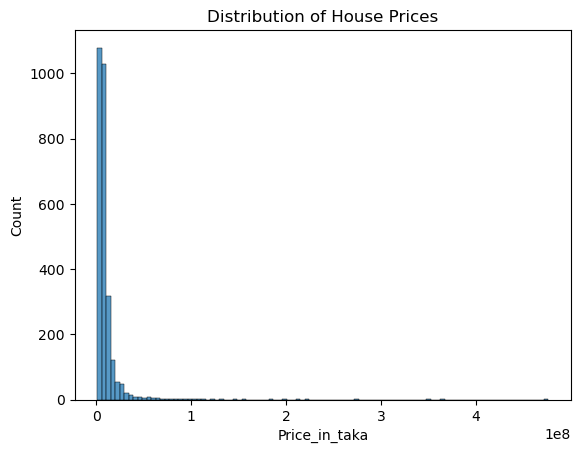

In [47]:
sns.histplot(df_clean['Price_in_taka'], bins = 100)
plt.title('Distribution of House Prices')
plt.show()

In [48]:
# We have left skewered data which is normal for price data

Correlation analysis

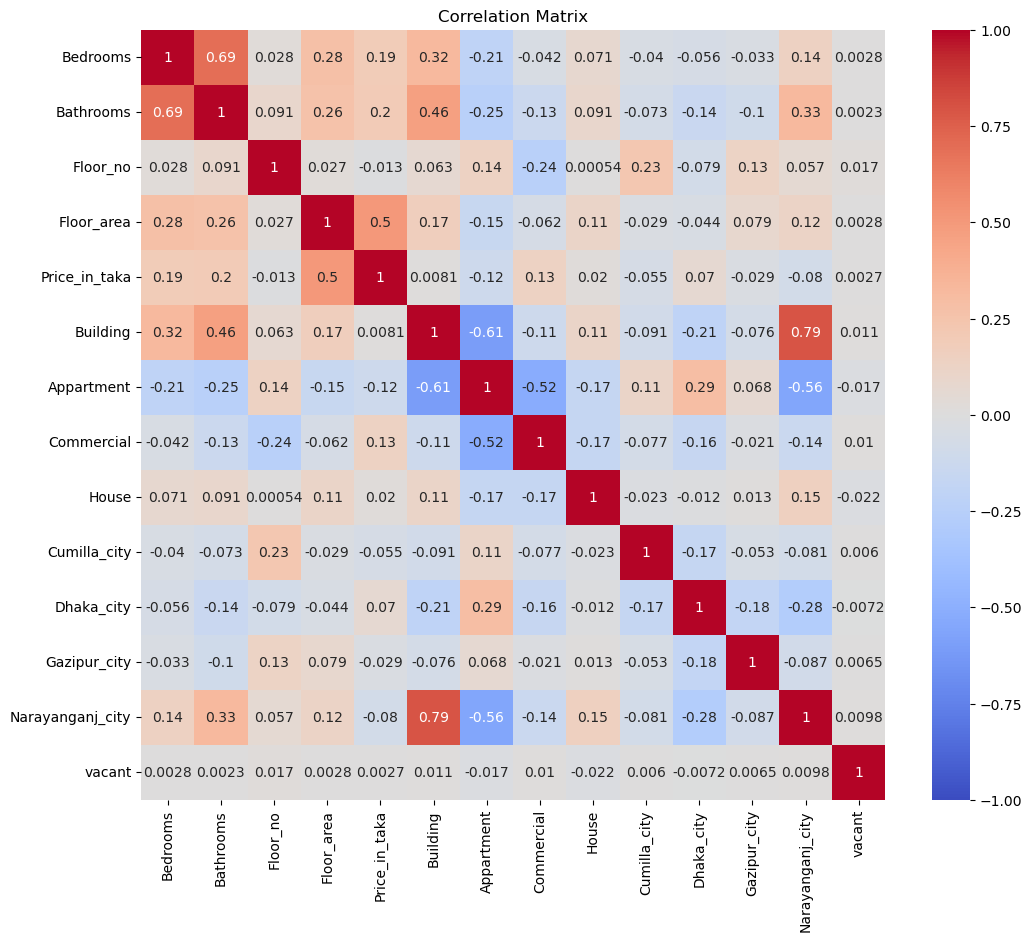

In [50]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_clean.corr(numeric_only = True), annot = True, vmin = -1, vmax = 1, cmap = "coolwarm")
plt.title('Correlation Matrix')
plt.show()

Exploring the features

City-wise analysis

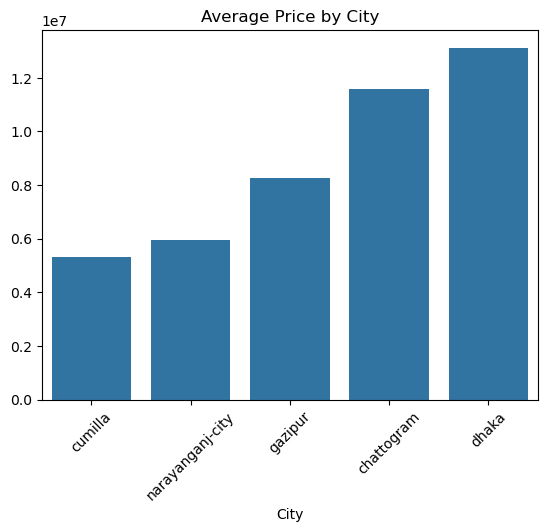

In [51]:
city_group = df_clean.groupby('City')['Price_in_taka'].mean().sort_values()
sns.barplot(x=city_group.index, y=city_group.values)
plt.title('Average Price by City')
plt.xticks(rotation=45)
plt.show()

Categorical data analysis

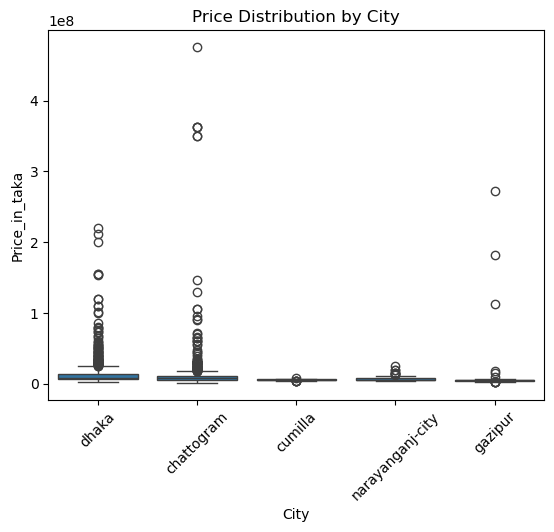

In [52]:
sns.boxplot(x='City', y='Price_in_taka', data=df_clean)
plt.title('Price Distribution by City')
plt.xticks(rotation=45)
plt.show()


Price vs. Floor Area

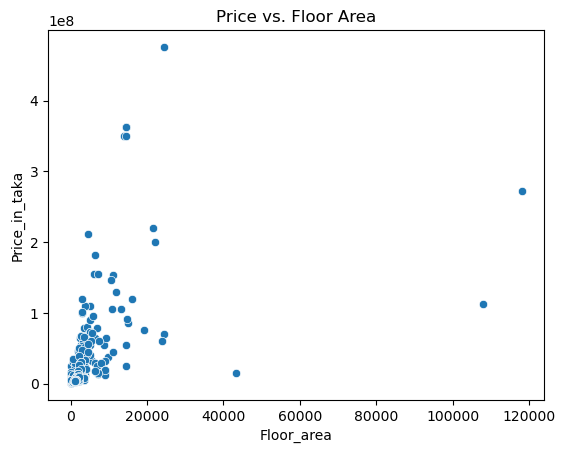

In [53]:
sns.scatterplot(x='Floor_area', y='Price_in_taka', data=df_clean)
plt.title('Price vs. Floor Area')
plt.show()


Price vs Floor number

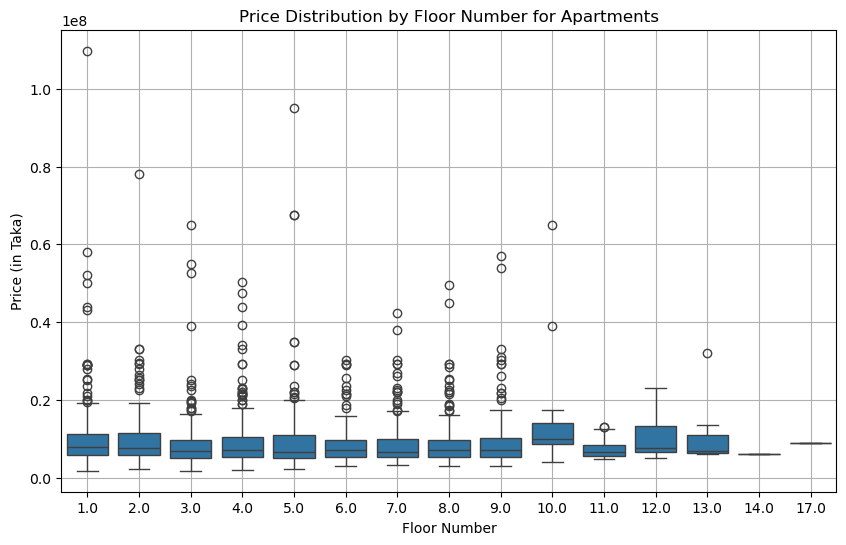

In [54]:
# Filter the data for apartments
df_apartments = df_clean[df_clean['Appartment'] == 1]

# Box plot for Apartments
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_apartments, x='Floor_no', y='Price_in_taka')
plt.title('Price Distribution by Floor Number for Apartments')
plt.xlabel('Floor Number')
plt.ylabel('Price (in Taka)')
plt.grid(True)
plt.show()


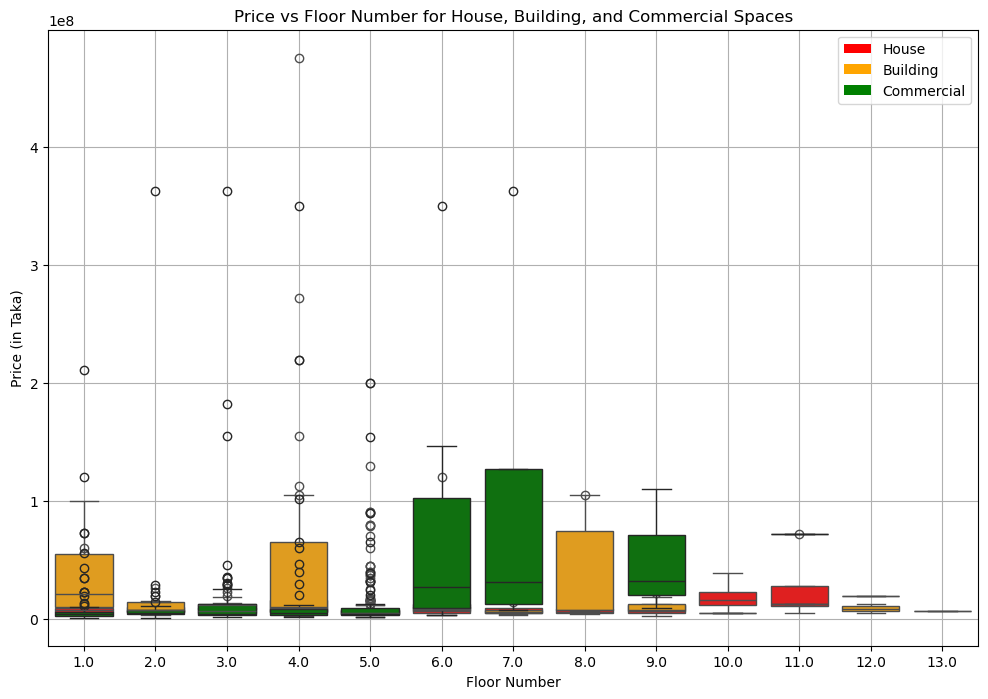

In [55]:
# Filter the data for house, building, or commercial properties
df_others = df_clean[(df_clean['House'] == 1) | (df_clean['Building'] == 1) | (df_clean['Commercial'] == 1)]

plt.figure(figsize=(12, 8))

# Boxplot for house, building, and commercial, without using the 'label' argument
sns.boxplot(data=df_others[df_others['House'] == 1], x='Floor_no', y='Price_in_taka', color='red')
sns.boxplot(data=df_others[df_others['Building'] == 1], x='Floor_no', y='Price_in_taka', color='orange')
sns.boxplot(data=df_others[df_others['Commercial'] == 1], x='Floor_no', y='Price_in_taka', color='green')

# Titles and labels
plt.title('Price vs Floor Number for House, Building, and Commercial Spaces')
plt.xlabel('Floor Number')
plt.ylabel('Price (in Taka)')
plt.grid(True)

# Create a custom legend since label parameter is not available in sns.boxplot
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', label='House'),
                   Patch(facecolor='orange', label='Building'),
                   Patch(facecolor='green', label='Commercial')]

plt.legend(handles=legend_elements)

# Show the plot
plt.show()


Price vs Floor area with City as interaction term

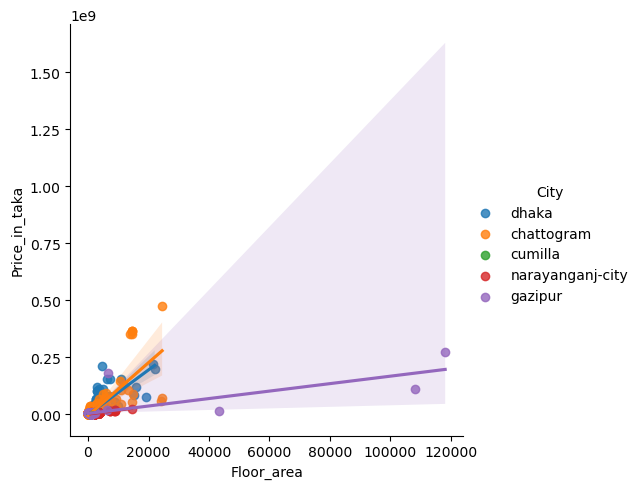

In [56]:
sns.lmplot(df_clean, x = "Floor_area", y = "Price_in_taka", hue = "City");

Preparing the data set for modeling

In [57]:
df_clean.head(1)

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location,Building,Appartment,Commercial,House,Cumilla_city,Dhaka_city,Gazipur_city,Narayanganj_city,vacant,Area,Sub_area
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,3.0,vacant,1960.0,dhaka,39000000.0,"Gulshan 1, Gulshan",0,1,0,0,0,1,0,0,1,Gulshan 1,Gulshan


In [54]:
df_model = df_clean[["Bedrooms", "Bathrooms", "Floor_no", "Floor_area",
                     "Building", "Appartment", "Commercial", "House",
                     "Cumilla_city", "Dhaka_city", "Gazipur_city", "Narayanganj_city", "vacant", "Price_in_taka"]]

In [59]:
df_model.head()

,Bedrooms,Bathrooms,Floor_no,Floor_area,Building,Appartment,Commercial,House,Cumilla_city,Dhaka_city,Gazipur_city,Narayanganj_city,vacant,Price_in_taka
0,3.0,4.0,3.0,1960.0,0,1,0,0,0,1,0,0,1,39000000.0
1,3.0,3.0,1.0,1705.0,0,1,0,0,0,1,0,0,1,16900000.0
2,3.0,3.0,6.0,1370.0,0,1,0,0,0,1,0,0,1,12500000.0
3,3.0,3.0,4.0,2125.0,0,1,0,0,0,1,0,0,1,20000000.0
4,3.0,3.0,4.0,2687.0,0,1,0,0,0,1,0,0,1,47500000.0


In [60]:
df_model.describe().round(2)

,Bedrooms,Bathrooms,Floor_no,Floor_area,Building,Appartment,Commercial,House,Cumilla_city,Dhaka_city,Gazipur_city,Narayanganj_city,vacant,Price_in_taka
count,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2.759000e+03
mean,3.19,3.08,4.55,1761.95,0.14,0.71,0.12,0.19,0.05,0.37,0.05,0.12,1.00,1.102447e+07
std,1.84,0.91,2.46,3525.22,0.35,0.45,0.33,0.39,0.21,0.48,0.23,0.32,0.03,2.292219e+07
min,1.00,1.00,1.00,84.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.050000e+06
25%,3.00,3.00,3.00,1100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,4.800000e+06
50%,3.00,3.00,5.00,1370.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,6.800000e+06
75%,3.00,3.00,6.00,1800.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.000000e+07
max,50.00,10.00,17.00,118080.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4.760000e+08


In [61]:
df_model.corr()

,Bedrooms,Bathrooms,Floor_no,Floor_area,Building,Appartment,Commercial,House,Cumilla_city,Dhaka_city,Gazipur_city,Narayanganj_city,vacant,Price_in_taka
Bedrooms,1.000000,0.694013,0.027940,0.276378,0.321179,-0.207523,-0.042044,0.070826,-0.040078,-0.056465,-0.032992,0.140666,0.002828,0.188341
Bathrooms,0.694013,1.000000,0.091061,0.264065,0.463559,-0.247033,-0.125891,0.091261,-0.072930,-0.144065,-0.100557,0.326915,0.002263,0.201565
Floor_no,0.027940,0.091061,1.000000,0.026943,0.062815,0.135462,-0.242423,0.000537,0.230429,-0.078585,0.129086,0.057352,0.016911,-0.013152
Floor_area,0.276378,0.264065,0.026943,1.000000,0.170364,-0.153109,-0.061978,0.113226,-0.029226,-0.044457,0.078547,0.124137,0.002762,0.504161
Building,0.321179,0.463559,0.062815,0.170364,1.000000,-0.606730,-0.114468,0.111967,-0.091166,-0.209689,-0.075530,0.791833,0.011042,0.008063
Appartment,-0.207523,-0.247033,0.135462,-0.153109,-0.606730,1.000000,-0.521590,-0.165820,0.114770,0.293122,0.067512,-0.560892,-0.017106,-0.115613
Commercial,-0.042044,-0.125891,-0.242423,-0.061978,-0.114468,-0.521590,1.000000,-0.166259,-0.077430,-0.163365,-0.020620,-0.135369,0.010013,0.134739
House,0.070826,0.091261,0.000537,0.113226,0.111967,-0.165820,-0.166259,1.000000,-0.022739,-0.011628,0.012776,0.150512,-0.021742,0.020147
Cumilla_city,-0.040078,-0.072930,0.230429,-0.029226,-0.091166,0.114770,-0.077430,-0.022739,1.000000,-0.170570,-0.053319,-0.080973,0.005989,-0.055300
Dhaka_city,-0.056465,-0.144065,-0.078585,-0.044457,-0.209689,0.293122,-0.163365,-0.011628,-0.170570,1.000000,-0.183922,-0.279311,-0.007227,0.070244


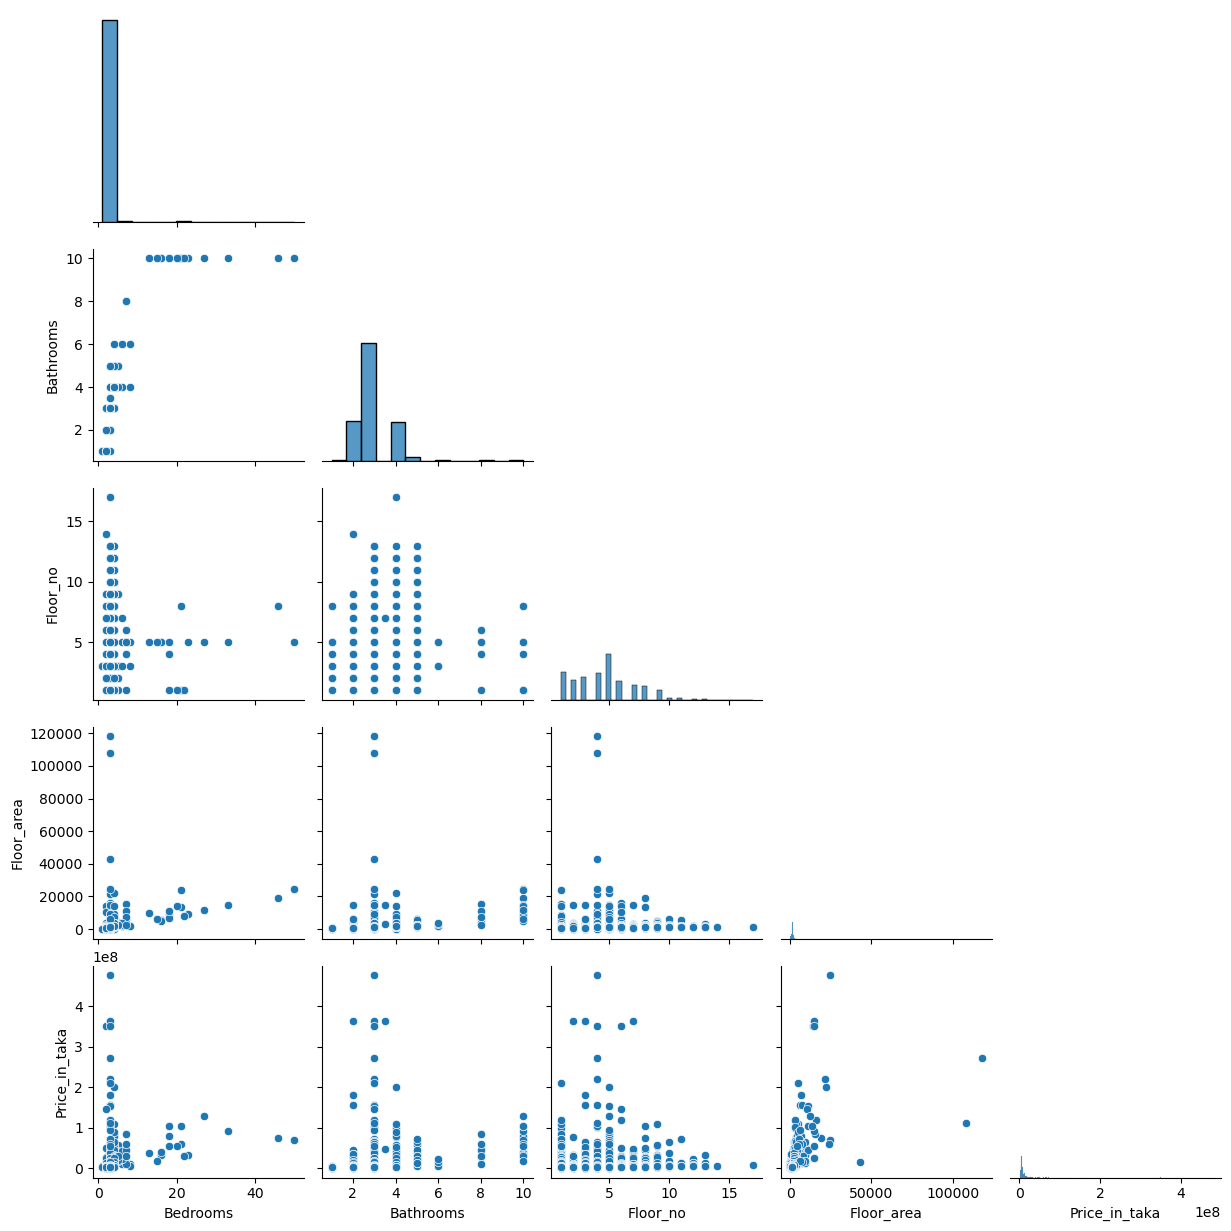

In [62]:
sns.pairplot(df_model[["Bedrooms", "Bathrooms", "Floor_no", "Floor_area", "Price_in_taka"]], corner = True)

In [55]:
df_model.isna().sum()

Bedrooms            0
Bathrooms           0
Floor_no            0
Floor_area          0
Building            0
Appartment          0
Commercial          0
House               0
Cumilla_city        0
Dhaka_city          0
Gazipur_city        0
Narayanganj_city    0
vacant              0
Price_in_taka       0
dtype: int64

Regression modeling

Linear Regression

In [56]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

Simple linear regression

In [57]:
# From correlation we see floor area is most correlated with price with 0.5

X = sm.add_constant(np.log(df_model[["Floor_area"]]))
y = np.log(df_model["Price_in_taka"])

X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2024)

kf = KFold(n_splits = 5, shuffle = True, random_state = 2024)

# Create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Loop in each fold in X and y
for train_ind, val_ind in kf.split(X, y):
    # Subset data based on CV folds
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    # Fit the model on fold's training data
    model = sm.OLS(y_train, X_train).fit()
    # Append validation score to list
    cv_lm_r2s.append(r2(y_val, model.predict(X_val)))
    cv_lm_mae.append(mae(np.exp(y_val), np.exp(model.predict(X_val))))

print("All validation R2s: ", [round(x, 3) for x in cv_lm_r2s])
print(f"Cross validation R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")

print("All validation MAEs: ", [round(x, 3) for x in cv_lm_mae])
print(f"Cross validation MAEs: {round(np.mean(cv_lm_mae), 3)} +- {round(np.std(cv_lm_mae), 3)}")

All validation R2s:  [0.384, 0.281, 0.397, 0.322, 0.319]
Cross validation R2s: 0.341 +- 0.044
All validation MAEs:  [5516230.491, 4111686.53, 6391301.513, 5603411.06, 6689574.22]
Cross validation MAEs: 5662440.763 +- 896207.763


Multiple linear regression

Feature engineering

In [58]:
df_model = df_model.assign(
    price_log = np.log(df_model["Price_in_taka"]),
    Floor_area_log = np.log(df_model["Floor_area"]),
    Bedrooms_Bathrooms = df_model["Bedrooms"] + df_model["Bathrooms"],
    Buil_Commer_House = df_model["Building"] + df_model["Commercial"] + df_model["House"],
    Bedrooms_2 = df_model["Bedrooms"] ** 2,
    Bathrooms_2 = df_model["Bathrooms"] ** 2,
    Bedrooms_3 = df_model["Bedrooms"] ** 3,
    Bathrooms_3 = df_model["Bathrooms"] ** 3,
    Floor_no_2 = df_model["Floor_no"] ** 2,
    Bedrooms_log = np.log(df_model["Bedrooms"]),
    Bathrooms_log = np.log(df_model["Bathrooms"]),
    Bedrooms_Bathrooms_log = np.log(df_model["Bedrooms"] + df_model["Bathrooms"]),
    Bedrooms_Bathrooms_2 = (df_model["Bedrooms"] + df_model["Bathrooms"]) ** 2,
    Floor_area_number_ration = np.where(df_model["Appartment"] == 1, np.log(df_model["Floor_area"]), 
                                        np.log(df_model["Floor_area"] / df_model["Floor_no"])),
    Bedrooms_Floor_area_log = df_model["Bedrooms"] * np.log(df_model["Floor_area"]),
    Bathrooms_Floor_area_log = df_model["Bathrooms"] * np.log(df_model["Floor_area"]),
    Bedrooms_Bathrooms_Floor_area_log = (df_model["Bedrooms"] + df_model["Bathrooms"]) * np.log(df_model["Floor_area"]),
    Bedrooms_2_Floor_area_log = df_model["Bedrooms"] ** 2 * np.log(df_model["Floor_area"]),
    Bathrooms_2_Floor_area_log = df_model["Bathrooms"] ** 2 * np.log(df_model["Floor_area"]),
)

df_model["Bedroom_bins"] = pd.cut(
    df_model["Bedrooms"], 
    bins=[0, 3, 6, 10, np.inf],  
    labels=["1-3 Small", "4-6 Medium", "7-10 Large", "11+ Extra-large"])

In [59]:
X = sm.add_constant(df_model[["Bedrooms", "Bedrooms_2", "Bathrooms", "Bathrooms_2",
                              "Floor_area_log", "Appartment", "Floor_no",
                              "Cumilla_city", "Dhaka_city", "Gazipur_city", "Narayanganj_city"]])
y = df_model["price_log"]

X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2024)

kf = KFold(n_splits = 5, shuffle = True, random_state = 2024)

# Create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Loop in each fold in X and y
for train_ind, val_ind in kf.split(X, y):
    # Subset data based on CV folds
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    # Fit the model on fold's training data
    model = sm.OLS(y_train, X_train).fit()
    # Append validation score to list
    cv_lm_r2s.append(r2(y_val, model.predict(X_val)))
    cv_lm_mae.append(mae(np.exp(y_val), np.exp(model.predict(X_val))))

print("All validation R2s: ", [round(x, 3) for x in cv_lm_r2s])
print(f"Cross validation R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")

print("All validation MAEs: ", [round(x, 3) for x in cv_lm_mae])
print(f"Cross validation MAEs: {round(np.mean(cv_lm_mae), 3)} +- {round(np.std(cv_lm_mae), 3)}")

All validation R2s:  [0.719, 0.631, 0.726, 0.648, 0.705]
Cross validation R2s: 0.686 +- 0.039
All validation MAEs:  [3878698.407, 2843080.774, 4637207.744, 3896625.063, 4810351.864]
Cross validation MAEs: 4013192.77 +- 696519.369


In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     356.7
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:03:10   Log-Likelihood:                -785.65
No. Observations:                1766   AIC:                             1595.
Df Residuals:                    1754   BIC:                             1661.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.5043      0.122     86.002      0.000      10.265      10.744
Bedrooms             0.0843      0.025      3.438      0.001       0.036       0.132
Bedrooms_2          -0.0014      0.000     -3.070      0.002      -0.002      -0.000
Bathrooms            0.5070      0.034     14.708      0.000       0.439       0.575
Bathrooms_2         -0.0480      0.005    -10.156      0.000      -0.057      -0.039
Floor_area_log       0.6433      0.015     41.958      0.000       0.613       0.673
Appartment          -0.5407      0.028    -19.330      0.000      -0.596      -0.486
Floor_no            -0.0101      0.004     -2.562      0.010      -0.018      -0.002
Cumilla_city        -0.2962      0.046     -6.474      0.000      -0.386      -0.206
Dhaka_city           0.1404      0.021      6.542      0.000       0.098       0.182
Gazipur_city        -0.3359      0.042     -7.939      0.000      -0.419      -0.253
Narayanganj_city    -1.5596      0.043    -36.389      0.000      -1.644      -1.475
==============================================================================
Omnibus:                      298.763   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1227.440
Skew:                           0.765   Prob(JB):                    2.92e-267
Kurtosis:                       6.787   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
df_model[["Bedrooms_Bathrooms", "Floor_no", "Floor_area_log", "Appartment", "Buil_Commer_House",
          "Cumilla_city", "Dhaka_city", "Gazipur_city", "Narayanganj_city", "price_log"]].corr()

,Bedrooms_Bathrooms,Floor_no,Floor_area_log,Appartment,Buil_Commer_House,Cumilla_city,Dhaka_city,Gazipur_city,Narayanganj_city,price_log
Bedrooms_Bathrooms,1.000000,0.052594,0.386364,-0.237332,0.250935,-0.054842,-0.092018,-0.059615,0.217816,0.349293
Floor_no,0.052594,1.000000,0.211543,0.135462,-0.097150,0.230429,-0.078585,0.129086,0.057352,0.024428
Floor_area_log,0.386364,0.211543,1.000000,0.117708,-0.004515,0.002403,0.053572,-0.052840,0.347930,0.593738
Appartment,-0.237332,0.135462,0.117708,1.000000,-0.764299,0.114770,0.293122,0.067512,-0.560892,0.070784
Buil_Commer_House,0.250935,-0.097150,-0.004515,-0.764299,1.000000,-0.112870,-0.224394,-0.048255,0.498803,-0.041545
Cumilla_city,-0.054842,0.230429,0.002403,0.114770,-0.112870,1.000000,-0.170570,-0.053319,-0.080973,-0.115982
Dhaka_city,-0.092018,-0.078585,0.053572,0.293122,-0.224394,-0.170570,1.000000,-0.183922,-0.279311,0.224523
Gazipur_city,-0.059615,0.129086,-0.052840,0.067512,-0.048255,-0.053319,-0.183922,1.000000,-0.087311,-0.161968
Narayanganj_city,0.217816,0.057352,0.347930,-0.560892,0.498803,-0.080973,-0.279311,-0.087311,1.000000,-0.154474
price_log,0.349293,0.024428,0.593738,0.070784,-0.041545,-0.115982,0.224523,-0.161968,-0.154474,1.000000


<Axes: ylabel='None'>

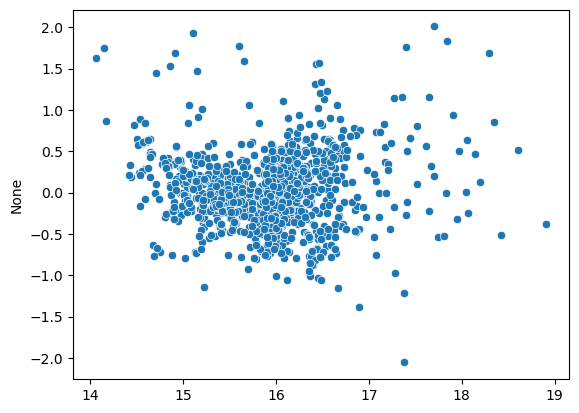

In [70]:
sns.scatterplot(x = model.predict(), y = model.resid)

In [166]:
import matplotlib.pyplot as plt
import scipy.stats as stats

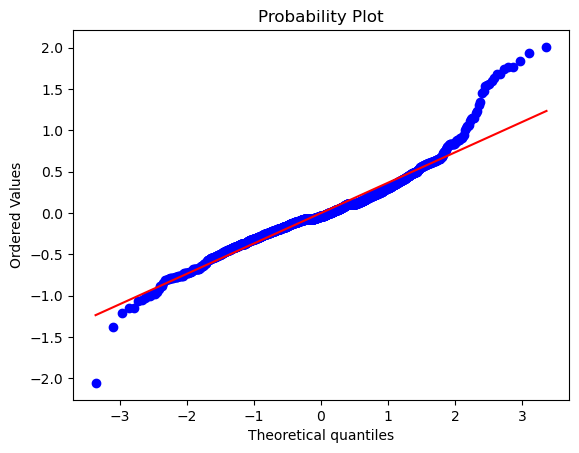

In [72]:
stats.probplot(model.resid, dist = "norm", plot = plt);

In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [74]:
variables = sm.OLS(y, X).exog

pd.Series([vif(variables, i) for i in range(variables.shape[1])], index = X.columns)

const               183.321599
Bedrooms             24.963086
Bedrooms_2           11.077579
Bathrooms            13.034712
Bathrooms_2          22.527827
Floor_area_log        1.891052
Appartment            2.013148
Floor_no              1.167505
Cumilla_city          1.153832
Dhaka_city            1.312001
Gazipur_city          1.131222
Narayanganj_city      2.300002
dtype: float64

In [75]:
influence = model.get_influence()
inf_summary_df = influence.summary_frame()
inf_summary_df.head(2)

,dfb_const,dfb_Bedrooms,dfb_Bedrooms_2,dfb_Bathrooms,dfb_Bathrooms_2,dfb_Floor_area_log,dfb_Appartment,dfb_Floor_no,dfb_Cumilla_city,dfb_Dhaka_city,dfb_Gazipur_city,dfb_Narayanganj_city,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
1783,0.001273,-0.000960,0.000855,0.000399,0.000537,-0.001230,-0.000854,-0.004557,0.002949,0.003927,0.002561,0.001787,0.000004,-0.131566,0.003108,-0.007347,-0.131529,-0.007344
1140,0.005398,-0.014002,0.011745,0.001803,0.007977,-0.003154,0.001584,0.009516,-0.003265,-0.002657,-0.002127,-0.000444,0.000038,0.168788,0.015798,0.021385,0.168741,0.021379


In [76]:
inf_summary_df["cooks_d"].sort_values(ascending = False)

1603    7.019966e-02
105     5.770730e-02
1246    5.053627e-02
1793    4.820390e-02
2251    3.107817e-02
            ...     
1940    1.355840e-09
536     1.162560e-09
929     5.618621e-10
190     5.432486e-10
394     4.740341e-10
Name: cooks_d, Length: 1766, dtype: float64

Ridge regression

In [61]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

In [62]:
pd.set_option('display.max_columns', None)
df_model.head()

,Bedrooms,Bathrooms,Floor_no,Floor_area,Building,Appartment,Commercial,House,Cumilla_city,Dhaka_city,Gazipur_city,Narayanganj_city,vacant,Price_in_taka,price_log,Floor_area_log,Bedrooms_Bathrooms,Buil_Commer_House,Bedrooms_2,Bathrooms_2,Bedrooms_3,Bathrooms_3,Floor_no_2,Bedrooms_log,Bathrooms_log,Bedrooms_Bathrooms_log,Bedrooms_Bathrooms_2,Floor_area_number_ration,Bedrooms_Floor_area_log,Bathrooms_Floor_area_log,Bedrooms_Bathrooms_Floor_area_log,Bedrooms_2_Floor_area_log,Bathrooms_2_Floor_area_log,Bedroom_bins
0,3.0,4.0,3.0,1960.0,0,1,0,0,0,1,0,0,1,39000000.0,17.479072,7.580700,7.0,0,9.0,16.0,27.0,64.0,9.0,1.098612,1.386294,1.945910,49.0,7.580700,22.742099,30.322799,53.064898,68.226298,121.291196,1-3 Small
1,3.0,3.0,1.0,1705.0,0,1,0,0,0,1,0,0,1,16900000.0,16.642824,7.441320,6.0,0,9.0,9.0,27.0,27.0,1.0,1.098612,1.098612,1.791759,36.0,7.441320,22.323961,22.323961,44.647922,66.971884,66.971884,1-3 Small
2,3.0,3.0,6.0,1370.0,0,1,0,0,0,1,0,0,1,12500000.0,16.341239,7.222566,6.0,0,9.0,9.0,27.0,27.0,36.0,1.098612,1.098612,1.791759,36.0,7.222566,21.667698,21.667698,43.335396,65.003094,65.003094,1-3 Small
3,3.0,3.0,4.0,2125.0,0,1,0,0,0,1,0,0,1,20000000.0,16.811243,7.661527,6.0,0,9.0,9.0,27.0,27.0,16.0,1.098612,1.098612,1.791759,36.0,7.661527,22.984581,22.984581,45.969162,68.953744,68.953744,1-3 Small
4,3.0,3.0,4.0,2687.0,0,1,0,0,0,1,0,0,1,47500000.0,17.676240,7.896181,6.0,0,9.0,9.0,27.0,27.0,16.0,1.098612,1.098612,1.791759,36.0,7.896181,23.688542,23.688542,47.377084,71.065625,71.065625,1-3 Small


In [63]:
X = sm.add_constant(df_model.drop(["Price_in_taka", "price_log", "Bedroom_bins",
                                   "vacant", "Floor_area", "Floor_area_number_ration", 
                                   "Bedrooms_log", "Floor_no", "Bathrooms", "Floor_no",
                                   "Bedrooms_Bathrooms", "Buil_Commer_House", 
                                   "Bedrooms_2", "Bedrooms_Bathrooms_2", 
                                   "Bathrooms_2", "Bedrooms_Bathrooms_log",
                                   "Bedrooms_Floor_area_log", "Bathrooms_2_Floor_area_log",
                                   "Bedrooms_Bathrooms_Floor_area_log", 
                                   "Bedrooms_2_Floor_area_log"], axis = 1))
y = df_model["price_log"]

X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2024)

In [64]:
std = StandardScaler()
X_tr = std.fit_transform(X.values)
X_te = std.transform(X_test.values)

In [65]:
n_alphas = 200
alphas = 10 ** np.linspace(-3, 3, n_alphas)

ridge_model = RidgeCV(alphas = alphas, cv = 5)

ridge_model.fit(X_tr, y)
print(f"Alpha: {ridge_model.alpha_}")
print(f"Train R²: {ridge_model.score(X_tr, y)}")
print(f"Mean absolute error: {mae(np.exp(y), np.exp(ridge_model.predict(X_tr)))}")

Alpha: 1.2750512407130128
Train R²: 0.7631584775507354
Mean absolute error: 3468979.236352783


Model assumptions

Equal variance of error

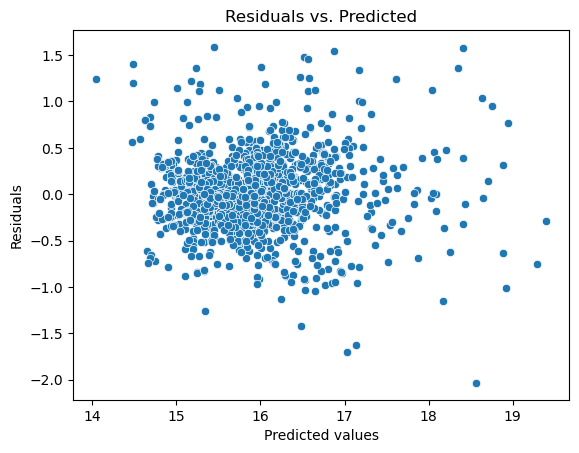

In [69]:
# Calculate the residuals
residuals = y - ridge_model.predict(X_tr)

# Plot predicted values vs. residuals
sns.scatterplot(x=ridge_model.predict(X_tr), y=residuals)
plt.title('Residuals vs. Predicted')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

Normality of errors

In [71]:
import matplotlib.pyplot as plt
import scipy.stats as stats

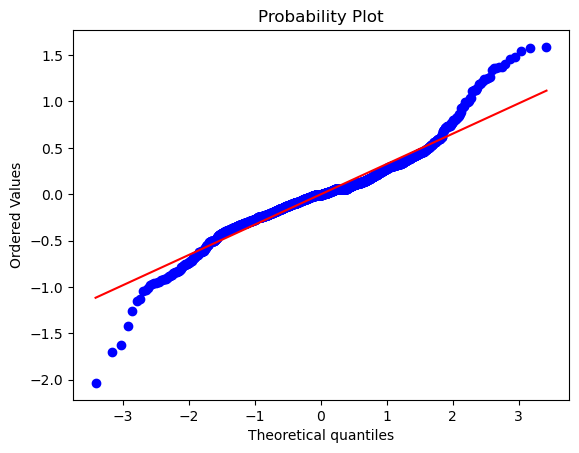

In [72]:
stats.probplot(residuals, dist = "norm", plot = plt);

No perfect multicollinearity

In [74]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

variables = X  

# Calculate VIF for each feature
vif_data = pd.Series([vif(variables, i) for i in range(variables.shape[1])], index=X.columns)

# Display the VIF results
print(vif_data)

const                       615.188863
Bedrooms                     17.464026
Building                      4.298019
Appartment                    4.726282
Commercial                    3.536144
House                         1.219007
Cumilla_city                  1.171916
Dhaka_city                    1.325424
Gazipur_city                  1.132072
Narayanganj_city              3.972007
Floor_area_log               10.625990
Bedrooms_3                    5.210184
Bathrooms_3                  35.177946
Floor_no_2                    1.176569
Bathrooms_log                26.173630
Bathrooms_Floor_area_log    109.080869
dtype: float64


Finaly validation of the model

In [76]:
print(f"Test R²: {ridge_model.score(X_te, y_test)}")
print(f"Test Mean absolute error: {mae(np.exp(y_test), np.exp(ridge_model.predict(X_te)))}")

Test R²: 0.7759167510007611
Test Mean absolute error: 3392546.2607882223


Lasso regression

In [84]:
from sklearn.linear_model import LassoCV

In [159]:
X = sm.add_constant(df_model.drop(["Price_in_taka", "price_log", "Bedroom_bins", "vacant", "Floor_area", 
                                   "Floor_area_number_ration", "Bedrooms_log", "Floor_no",
                                   "Bathrooms", "Floor_no", "Bedrooms_Bathrooms", "Buil_Commer_House", "Bedrooms_2",
                                   "Bathrooms_2", "Bedrooms_Bathrooms_log", "Bedrooms_Bathrooms_2", "Bedrooms_Floor_area_log",
                                   "Bedrooms_Bathrooms_Floor_area_log", "Bedrooms_2_Floor_area_log", "Bathrooms_2_Floor_area_log"], axis = 1))
y = df_model["price_log"]

X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2024)

In [160]:
std = StandardScaler()
X_tr = std.fit_transform(X.values)
X_te = std.transform(X_test.values)

In [161]:
n_alphas = 200
alphas = 10 ** np.linspace(-3, 3, n_alphas)

Lasso_model = LassoCV(alphas = alphas, cv = 5)

Lasso_model.fit(X_tr, y)
print(f"Alpha: {Lasso_model.alpha_}")
print(f"Train R²: {Lasso_model.score(X_tr, y)}")
print(f"Mean absolute error: {mae(np.exp(y), np.exp(Lasso_model.predict(X_tr)))}")

Alpha: 0.001
Train R²: 0.7622230595108627
Mean absolute error: 3466443.13665751


In [162]:
coefficients = pd.Series(Lasso_model.coef_, index=X.columns)

with open('lasso_coefficients.txt', 'w') as file:
    for index, value in coefficients.items():
        file.write(f"{index}: {value}\n")

Elestic net regression

In [86]:
from sklearn.linear_model import ElasticNetCV

In [151]:
X = sm.add_constant(df_model.drop(["Price_in_taka", "price_log", "Bedroom_bins", "vacant", "Floor_area", 
                                   "Floor_area_number_ration", "Bedrooms_log", "Floor_no_2",
                                   "Bathrooms", "Floor_no", "Bedrooms_Bathrooms", "Buil_Commer_House", "Bedrooms_2",
                                   "Bathrooms_2", "Bedrooms_Bathrooms_log", "Bedrooms_Bathrooms_2", "Bedrooms_Floor_area_log",
                                   "Bedrooms_Bathrooms_Floor_area_log", "Bedrooms_2_Floor_area_log", "Bathrooms_2_Floor_area_log"], axis = 1))
y = df_model["price_log"]

X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2024)

In [152]:
std = StandardScaler()
X_tr = std.fit_transform(X.values)
X_te = std.transform(X_test.values)

In [153]:
alphas = 10 ** np.linspace(-3, 3, 200)
l1_ratios = np.linspace(.1, 1, 10)

enet_model = ElasticNetCV(alphas = alphas, l1_ratio = l1_ratios, cv = 5)

enet_model.fit(X_tr, y)

print(f"Alpha: {enet_model.alpha_}")
print(f"Lambda: {enet_model.alpha_}")
print(f"Train R²: {enet_model.score(X_tr, y)}")
print(f"Mean absolute error: {mae(np.exp(y), np.exp(enet_model.predict(X_tr)))}")

Alpha: 0.001
Lambda: 0.001
Train R²: 0.7627697500503838
Mean absolute error: 3463015.244198938


In [157]:
X = sm.add_constant(df_model.drop(["Price_in_taka", "price_log", "Bedroom_bins", "vacant", "Floor_area", 
                                   "Floor_area_number_ration", "Bedrooms_log", "Floor_no",
                                   "Bathrooms", "Floor_no", "Bedrooms_Bathrooms", "Buil_Commer_House", "Bedrooms_2",
                                   "Bathrooms_2", "Bedrooms_Bathrooms_log", "Bedrooms_Bathrooms_2", "Bedrooms_Floor_area_log",
                                   "Bedrooms_Bathrooms_Floor_area_log", "Bedrooms_2_Floor_area_log", "Bathrooms_2_Floor_area_log"], axis = 1))
y = df_model["price_log"]

X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2024)

kf = KFold(n_splits = 5, shuffle = True, random_state = 2024)

# Create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Loop in each fold in X and y
for train_ind, val_ind in kf.split(X, y):
    # Subset data based on CV folds
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    # Fit the model on fold's training data
    model = sm.OLS(y_train, X_train).fit()
    # Append validation score to list
    cv_lm_r2s.append(r2(y_val, model.predict(X_val)))
    cv_lm_mae.append(mae(np.exp(y_val), np.exp(model.predict(X_val))))

print("All validation R2s: ", [round(x, 3) for x in cv_lm_r2s])
print(f"Cross validation R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")

print("All validation MAEs: ", [round(x, 3) for x in cv_lm_mae])
print(f"Cross validation MAEs: {round(np.mean(cv_lm_mae), 3)} +- {round(np.std(cv_lm_mae), 3)}")

All validation R2s:  [0.791, 0.747, 0.764, 0.702, 0.748]
Cross validation R2s: 0.75 +- 0.029
All validation MAEs:  [3156743.592, 2295671.461, 6114911.578, 3679431.634, 4523251.419]
Cross validation MAEs: 3954001.937 +- 1300357.269


In [158]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        19:04:51   Log-Likelihood:                -537.37
No. Observations:                1766   AIC:                             1107.
Df Residuals:                    1750   BIC:                             1194.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       10.9984      0.201     54.721      0.000      10.604      11.393
Bedrooms                     0.0727      0.018      4.139      0.000       0.038       0.107
Building                    -0.3324      0.045     -7.444      0.000      -0.420      -0.245
Appartment                  -0.2860      0.037     -7.749      0.000      -0.358      -0.214
Commercial                   0.7609      0.046     16.711      0.000       0.672       0.850
House                       -0.0763      0.022     -3.414      0.001      -0.120      -0.032
Cumilla_city                -0.2443      0.040     -6.099      0.000      -0.323      -0.166
Dhaka_city                   0.1784      0.019      9.516      0.000       0.142       0.215
Gazipur_city                -0.2761      0.037     -7.502      0.000      -0.348      -0.204
Narayanganj_city            -1.1360      0.048    -23.424      0.000      -1.231      -1.041
Floor_area_log               0.5585      0.032     17.198      0.000       0.495       0.622
Bedrooms_3               -2.634e-05   5.91e-06     -4.456      0.000   -3.79e-05   -1.47e-05
Bathrooms_3                 -0.0055      0.001     -9.747      0.000      -0.007      -0.004
Floor_no_2                  -0.0006      0.000     -1.811      0.070      -0.001     4.7e-05
Bathrooms_log               -0.7317      0.153     -4.771      0.000      -1.033      -0.431
Bathrooms_Floor_area_log     0.0852      0.009      9.017      0.000       0.067       0.104
==============================================================================
Omnibus:                      186.597   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1100.284
Skew:                           0.297   Prob(JB):                    1.19e-239
Kurtosis:                       6.821   Cond. No.                     9.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: ylabel='None'>

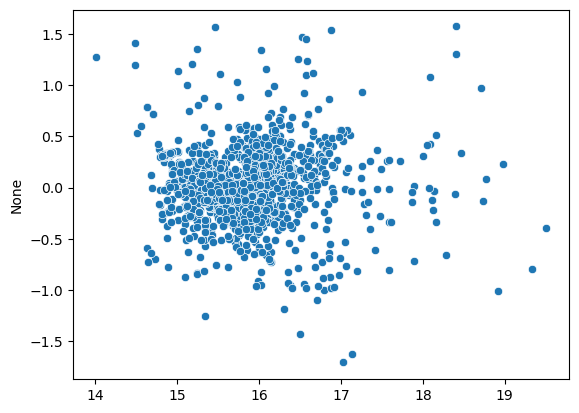

In [168]:
sns.scatterplot(x = model.predict(), y = model.resid)

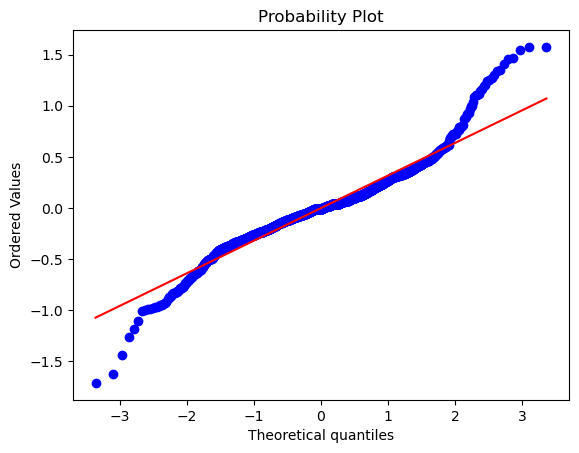

In [169]:
stats.probplot(model.resid, dist = "norm", plot = plt);

In [170]:
variables = sm.OLS(y, X).exog

pd.Series([vif(variables, i) for i in range(variables.shape[1])], index = X.columns)

const                       615.188863
Bedrooms                     17.464026
Building                      4.298019
Appartment                    4.726282
Commercial                    3.536144
House                         1.219007
Cumilla_city                  1.171916
Dhaka_city                    1.325424
Gazipur_city                  1.132072
Narayanganj_city              3.972007
Floor_area_log               10.625990
Bedrooms_3                    5.210184
Bathrooms_3                  35.177946
Floor_no_2                    1.176569
Bathrooms_log                26.173630
Bathrooms_Floor_area_log    109.080869
dtype: float64

In [172]:
influence = model.get_influence()
inf_summary_df = influence.summary_frame()
inf_summary_df.head(2)

,dfb_const,dfb_Bedrooms,dfb_Building,dfb_Appartment,dfb_Commercial,dfb_House,dfb_Cumilla_city,dfb_Dhaka_city,dfb_Gazipur_city,dfb_Narayanganj_city,dfb_Floor_area_log,dfb_Bedrooms_3,dfb_Bathrooms_3,dfb_Floor_no_2,dfb_Bathrooms_log,dfb_Bathrooms_Floor_area_log,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
1783,0.002076,-0.000516,0.000589,-0.000048,0.000305,0.001619,0.003423,0.004251,0.002641,0.000642,-0.002403,0.000408,-0.001337,-0.004960,-0.001515,0.001943,0.000004,-0.148013,0.003220,-0.008412,-0.147972,-0.008410
1140,-0.003365,0.004764,0.000325,-0.001856,-0.001544,-0.004613,0.001603,0.001159,0.001179,-0.000216,0.003502,-0.003745,0.000750,-0.005422,0.002514,-0.003510,0.000007,-0.071928,0.021937,-0.010772,-0.071908,-0.010769


In [173]:
inf_summary_df["cooks_d"].sort_values(ascending = False)

1490    7.584418e-02
589     6.385727e-02
1603    5.540708e-02
773     5.170614e-02
1793    4.702412e-02
211     3.484319e-02
267     2.891727e-02
2251    2.765498e-02
2850    2.753871e-02
2754    2.705266e-02
1424    2.589612e-02
50      2.385842e-02
105     2.344605e-02
1246    2.309068e-02
2752    2.252682e-02
263     2.162312e-02
1689    1.917794e-02
1016    1.776607e-02
1020    1.502349e-02
930     1.404057e-02
1150    1.287979e-02
2301    1.286312e-02
2010    1.264917e-02
1530    1.187954e-02
1933    1.176135e-02
1852    1.168586e-02
380     1.137423e-02
1850    1.123426e-02
398     1.077452e-02
1145    1.073217e-02
832     1.072493e-02
545     1.053631e-02
1458    1.053027e-02
2720    1.015555e-02
1980    9.884378e-03
2025    9.619526e-03
1916    9.389503e-03
823     9.361625e-03
1661    9.270860e-03
192     9.201201e-03
1667    8.750111e-03
875     8.182821e-03
1203    7.941520e-03
1205    7.899754e-03
1274    7.819792e-03
2205    7.814425e-03
1623    7.321854e-03
1785    7.143